In [1]:
# Written by Anna C Helfeld C
# Fall 2018-Winter 2019

# This code uses my solutions written in Octave/Matlab as a guide
# Machine Learning (Andrew Ng class on Coursera)
# Homework 7: Principal Components Analysis

In [34]:
# Import libraries
from pandas import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
from numpy.linalg import svd
from PIL import Image

In [3]:
# Make sure file exists
import os  
os.path.isfile('./ex7data1.mat')    # True  

True

In [4]:
# Load data
import h5py 
data = sio.loadmat('ex7data1.mat') 
data

{'X': array([[3.38156267, 3.38911268],
        [4.52787538, 5.8541781 ],
        [2.65568187, 4.41199472],
        [2.76523467, 3.71541365],
        [2.84656011, 4.17550645],
        [3.89067196, 6.48838087],
        [3.47580524, 3.63284876],
        [5.91129845, 6.68076853],
        [3.92889397, 5.09844661],
        [4.56183537, 5.62329929],
        [4.57407171, 5.39765069],
        [4.37173356, 5.46116549],
        [4.19169388, 4.95469359],
        [5.24408518, 4.66148767],
        [2.8358402 , 3.76801716],
        [5.63526969, 6.31211438],
        [4.68632968, 5.6652411 ],
        [2.85051337, 4.62645627],
        [5.1101573 , 7.36319662],
        [5.18256377, 4.64650909],
        [5.70732809, 6.68103995],
        [3.57968458, 4.80278074],
        [5.63937773, 6.12043594],
        [4.26346851, 4.68942896],
        [2.53651693, 3.88449078],
        [3.22382902, 4.94255585],
        [4.92948801, 5.95501971],
        [5.79295774, 5.10839305],
        [2.81684824, 4.81895769],
        [

In [5]:
# Put X into array
Xdata = data['X']
Xdata.shape

(50L, 2L)

In [6]:
# Normalize the data
Xdf = DataFrame(Xdata)
Xmean = Xdf.mean()
Xstd = Xdf.std()

In [7]:
def normalize(group, mean, std):
    return (group - mean) / std
X_norm = normalize(Xdf, Xmean, Xstd)

In [8]:
X_norm.head()

,0,1
0,-0.518054,-1.576784
1,0.459154,0.831899
2,-1.136851,-0.577298
3,-1.043460,-1.257946
4,-0.974132,-0.808377


In [9]:
# Convert to numpy array
Xarr = X_norm.values

In [10]:
# Calculate covariance matrix
Sigma=np.matmul(np.transpose(Xarr),Xarr)/Xarr.shape[0]
Sigma

array([[0.98      , 0.72081977],
       [0.72081977, 0.98      ]])

In [11]:
# Singular value decomposition to get eigenvalues, eigenvectors
U = svd(Sigma)[0]
S = svd(Sigma)[1]

In [12]:
# Define dimensions
K = 1

In [13]:
Ureduce=U[:,0]
Z=np.matmul(Xarr,Ureduce)  #mxn times nxk = mxk  

In [14]:
# Recover Xs
X_rec=np.matmul(Z.reshape(Z.shape[0],1),np.transpose(Ureduce.reshape(Ureduce.shape[0],1))) #mXK time Kxn 

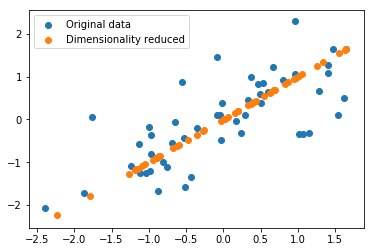

In [15]:
#Plot to see what it looks like
plt.scatter(Xarr[:,0], Xarr[:,1], label = 'Original data')
plt.scatter(X_rec[:,0], X_rec[:,1], label = 'Dimensionality reduced')
plt.legend()

In [47]:
# Next dataset
dfaces = sio.loadmat('ex7facesorig.mat') 

In [48]:
# Put X into array
Xdface = dfaces['X']
Xdface.shape

(5000L, 1024L)

In [49]:
# Convert to image
firstface = Xdface[0,:]
dim = (Xdface.shape[1])**0.5
im1 = 255-firstface.reshape((int(dim),int(dim))).astype('uint8')
im1

array([[ 36,  44,  52, ...,  96, 104,  90],
       [ 24,  32,  37, ..., 108, 110, 103],
       [ 15,  15,  23, ..., 110, 110, 111],
       ...,
       [  2,  15,  53, ..., 195, 180, 180],
       [ 15,  20,  42, ...,  44,   2, 224],
       [ 15,  22,  25, ..., 109, 110,  98]], dtype=uint8)

In [50]:
imf = Image.fromarray(im1)
imf.save("face.jpg")

In [51]:
# Normalize the data
Xdf = DataFrame(Xdface)
Xfmean = Xdf.mean()
Xfstd = Xdf.std()

In [74]:
Xdf.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,-37.866314,-45.866314,-53.866314,-51.866314,-40.866314,-33.866314,-47.866314,-37.866314,-22.866314,-7.866314,...,-91.866314,-113.866314,-123.866314,-102.866314,-84.866314,-94.866314,-99.866314,-110.866314,-111.866314,-99.866314
1,8.133686,-0.866314,-8.866314,-15.866314,-17.866314,-16.866314,-15.866314,-21.866314,-42.866314,-28.866314,...,-47.866314,-54.866314,-54.866314,-59.866314,-74.866314,-86.866314,-70.866314,-34.866314,-8.866314,0.133686
2,-32.866314,-34.866314,-36.866314,-18.866314,6.133686,15.133686,-1.866314,-31.866314,-1.866314,13.133686,...,-36.866314,-41.866314,-46.866314,-51.866314,-73.866314,-96.866314,-105.866314,-110.866314,-111.866314,-111.866314
3,-84.866314,-64.866314,-47.866314,-42.866314,-38.866314,-28.866314,-17.866314,-11.866314,-10.866314,-12.866314,...,-37.866314,-38.866314,-41.866314,-45.866314,-48.866314,-55.866314,-56.866314,-56.866314,-57.866314,-53.866314
4,2.133686,6.133686,5.133686,9.133686,10.133686,11.133686,11.133686,11.133686,12.133686,12.133686,...,-42.866314,-59.866314,-72.866314,-70.866314,-68.866314,-56.866314,-30.866314,-9.866314,0.133686,-14.866314


In [52]:
def normalize(group, mean, std):
    return (group - mean) / std
Xf_norm = normalize(Xdf, Xfmean, Xfstd)

In [53]:
Xf_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,-0.315209,-0.497533,-0.690515,-0.680459,-0.478780,-0.355614,-0.676538,-0.501256,-0.237421,0.014403,...,-1.595768,-1.974134,-2.100094,-1.602532,-1.180701,-1.307853,-1.344796,-1.485807,-1.439685,-1.183700
1,0.583947,0.395982,0.219142,0.055429,-0.002720,-0.001035,-0.005432,-0.165254,-0.657583,-0.427394,...,-0.675402,-0.769629,-0.717900,-0.757499,-0.987331,-1.155086,-0.800390,-0.083751,0.419771,0.585731
2,-0.217474,-0.279118,-0.346866,-0.005895,0.494039,0.666410,0.288177,-0.375255,0.203749,0.456199,...,-0.445311,-0.504230,-0.557645,-0.600284,-0.967994,-1.346045,-1.457431,-1.485807,-1.439685,-1.396032
3,-1.233911,-0.874794,-0.569227,-0.496487,-0.437383,-0.251326,-0.047376,0.044747,0.014676,-0.090787,...,-0.466228,-0.442984,-0.457486,-0.482372,-0.484570,-0.563112,-0.537573,-0.489609,-0.464824,-0.369762
4,0.466666,0.534973,0.502147,0.566462,0.576832,0.582979,0.560814,0.527749,0.497863,0.435161,...,-0.570815,-0.871706,-1.078472,-0.973671,-0.871309,-0.582208,-0.049485,0.377452,0.582248,0.320317


In [55]:
# Calculate covariance matrix
Xf_arr = Xf_norm.values
Sigma=np.matmul(np.transpose(Xf_arr),Xf_arr)/Xf_arr.shape[0]
Sigma.shape

(1024L, 1024L)

In [56]:
# Singular value decomposition to get eigenvalues, eigenvectors
U = svd(Sigma)[0]
S = svd(Sigma)[1]

In [77]:
# Reduce dimensionality
K=10
Ureduce=U[:,0:K]
Z=np.matmul(Xf_arr,Ureduce)  #mxn times nxk = mxk  

In [78]:
# Recover Xs
X_rec=np.matmul(Z,np.transpose(Ureduce)) #mXK time Kxn 

In [79]:
# Convert back to non-normalized values
Xdfrec = DataFrame(X_rec)
Xrec_orig = (Xdfrec*Xfstd)+Xfmean

In [80]:
Xrec_orig.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,-30.721470,-30.644887,-30.470514,-30.269510,-30.813591,-31.621052,-32.478146,-33.398115,-32.708817,-32.460285,...,-44.494897,-47.499728,-50.048095,-52.533533,-55.200389,-57.510103,-58.101703,-58.190832,-57.928514,-56.717681
1,4.524449,5.216626,4.893510,4.236284,2.563474,0.057693,-2.558936,-5.509796,-7.100817,-8.012918,...,-54.255234,-56.170618,-57.228477,-58.262924,-59.588744,-60.708090,-61.154120,-61.390716,-61.045313,-59.569250
2,21.863899,23.183555,23.945683,23.846021,22.651583,20.929319,19.352977,17.790331,17.490196,18.334807,...,-29.907919,-31.289893,-32.601736,-33.939122,-35.699175,-37.825060,-39.554064,-41.454414,-43.016645,-43.064117
3,-16.775485,-16.275450,-15.781915,-16.150085,-17.184677,-18.772979,-20.565048,-21.994830,-22.317182,-20.915575,...,-41.130575,-42.076403,-42.732499,-43.194563,-43.680216,-43.852748,-44.181475,-44.724911,-45.204359,-44.864786
4,-21.397700,-20.500699,-18.534482,-17.228409,-15.695785,-13.417910,-11.868687,-10.604824,-8.598469,-7.315303,...,-46.270160,-47.537327,-48.219972,-48.657873,-49.257811,-49.979683,-50.156887,-50.076886,-50.433659,-50.177442


In [81]:
# Convert to image
Xdface = Xrec_orig.values
firstface = Xdface[0,:]
dim = (Xdface.shape[1])**0.5
im1 = 255-firstface.reshape((int(dim),int(dim))).astype('uint8')
im1

array([[29, 29, 29, ..., 87, 87, 86],
       [20, 19, 20, ..., 88, 89, 88],
       [10, 10, 11, ..., 87, 88, 88],
       ...,
       [ 5,  5,  7, ..., 50, 51, 52],
       [15, 14, 14, ..., 55, 56, 55],
       [24, 22, 21, ..., 57, 56, 55]], dtype=uint8)

In [82]:
imf = Image.fromarray(im1)
imf.save("face_red.jpg")